In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Zilean/Desktop/Illinois Courses/Fall 2019/IE 598 Machine Learning/homework/hw2/Treasury Squeeze test - DS1.csv')
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0,1,0,1,1,1,1,0,0,True
1,2,TUH93 Comdty,0,1,1,0,1,1,0,0,1,False
2,3,TUM93 Comdty,0,0,1,1,0,0,0,0,0,False
3,4,TUU93 Comdty,1,1,0,0,0,0,0,1,1,True
4,5,TUZ93 Comdty,0,0,1,1,1,1,1,0,0,False


In [3]:
df.shape

(900, 12)

In [4]:
df = df.drop(df.columns[0:2], axis=1)
df_X = df.iloc[:,6:8]
df_y = df.iloc[:,-1]
df.head()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,0,1,0,1,1,1,1,0,0,True
1,0,1,1,0,1,1,0,0,1,False
2,0,0,1,1,0,0,0,0,0,False
3,1,1,0,0,0,0,0,1,1,True
4,0,0,1,1,1,1,1,0,0,False


In [5]:
df.shape

(900, 10)

In [6]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_X, df_y, test_size=0.3,random_state=1, stratify=df_y)

In [7]:
sc = StandardScaler()
sc.fit(X_train_knn)
X_train_std = sc.transform(X_train_knn)
X_test_std = sc.transform(X_test_knn)

G:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [9]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train_knn)

G:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test_knn != y_pred).sum())

Misclassified samples: 149


In [13]:
print('Accuracy: %.2f' % accuracy_score(y_test_knn, y_pred))

Accuracy: 0.45


In [14]:
def plot_decision_regions(X, y, classifier, test_idx = None,resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl,edgecolor='black')
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='test set')

In [15]:
k_range = range(1,26)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_std, y_train_knn)
    y_pred = knn.predict(X_test_std)
    score.append(accuracy_score(y_test_knn, y_pred))
best_k = score.index(np.max(score)) + 1
print('Best K should be: ',best_k)

Best K should be:  14


In [16]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_std, y_train_knn)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train_knn, y_test_knn))
plot_decision_regions(X_combined_std, y_combined, classifier=knn_1, test_idx=range(105,150))
plt.xlabel('ctd1_percent')
plt.ylabel('delivery_cost')
plt.legend(loc='upper left')
plt.show()

NameError: name 'knn_1' is not defined

G:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


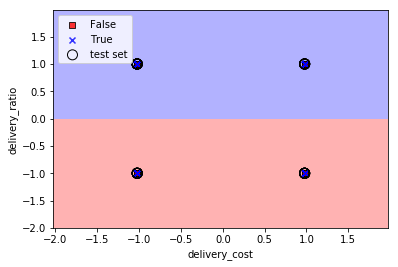

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df_x_tree = df.iloc[:,7:9]
df_y_tree = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(df_x_tree, df_y_tree
, test_size=0.3, random_state=1, stratify=df_y_tree)
sc = StandardScaler()
sc.fit(X_train)
X_train_std_tree = sc.transform(X_train)
X_test_std_tree = sc.transform(X_test)
tree = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)
tree.fit(X_train_std_tree, y_train)
X_combined = np.vstack((X_train_std_tree, X_test_std_tree))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined ,y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('delivery_cost')
plt.ylabel('delivery_ratio')
plt.legend(loc='upper left')
plt.show()

In [17]:
print("My name is Zihan Chen")
print("My NetID is: zihanc7")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zihan Chen
My NetID is: zihanc7
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
